In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as op
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
classes=["scissors","rock","paper"]

In [ ]:

temp_data = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/rock-paper-scissors/train/", transform=tf.Compose([tf.ToTensor(),tf.Resize((224,224))]))
temp_loader = DataLoader(temp_data, batch_size=16, shuffle=False, num_workers=2)
print(temp_data)

Dataset ImageFolder
    Number of datapoints: 2527
    Root location: /content/drive/MyDrive/rock-paper-scissors/train/
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
           )


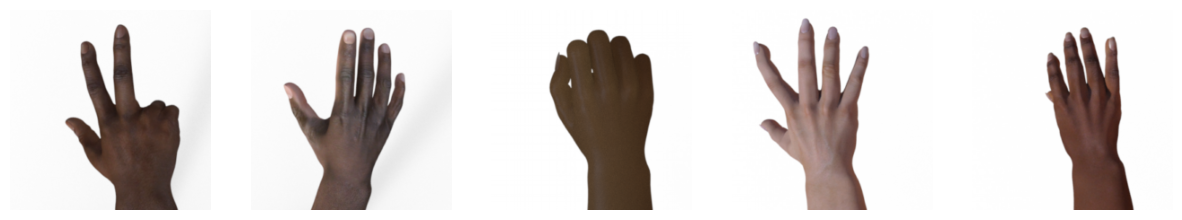

In [ ]:
random_nums=np.random.randint(0,len(temp_data),5)
display_images = [temp_data[i][0].permute(1, 2, 0).numpy() for i in random_nums]

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, img in enumerate(display_images):
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

In [ ]:
mean = 0.
std = 0.
nb_samples = 0.

for data, _ in temp_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print("Mean: ",mean)
print("Std: ",std)

Mean:  tensor([0.8503, 0.8216, 0.8117])
Std:  tensor([0.2226, 0.2673, 0.2826])


In [ ]:
normalize=tf.Normalize(mean=mean,std=std)

In [ ]:
train_data=torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/rock-paper-scissors/train/",transform=tf.Compose([tf.ToTensor(),tf.Resize((224,224)),normalize]))
test_data=torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/rock-paper-scissors/test/",transform=tf.Compose([tf.ToTensor(),tf.Resize((224,224)),normalize]))
validation_data=torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/rock-paper-scissors/validation/",transform=tf.Compose([tf.ToTensor(),tf.Resize((224,224)),normalize]))
train_loader=DataLoader(train_data,batch_size=16,shuffle=True,num_workers=2)
test_loader=DataLoader(test_data,batch_size=16,shuffle=True,num_workers=2)
validation_loader=DataLoader(validation_data,batch_size=16,shuffle=True,num_workers=2)


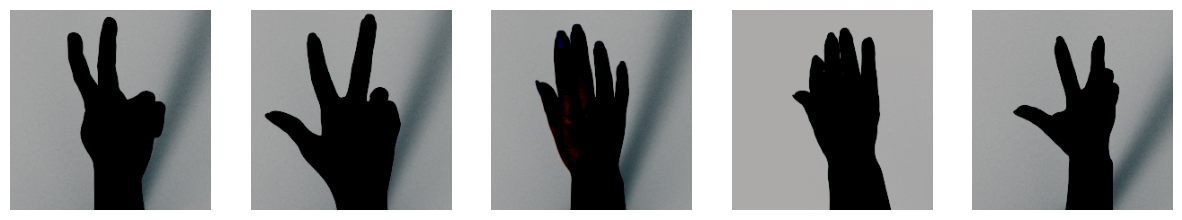

In [ ]:
random_nums=np.random.randint(0,len(train_data),5)
display_images = [train_data[i][0].permute(1, 2, 0).numpy() for i in random_nums]

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, img in enumerate(display_images):
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(150528, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 3)
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for images, labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [ ]:
correct=0
total=0
model.eval()
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    outputs=model(images)
    predicted=torch.max(outputs.data,1)[1]
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
print('Accuracy: ',100*correct/total)

Accuracy:  69.35483870967742


In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=5)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv2=nn.Conv2d(in_channels=12,out_channels=24,kernel_size=5)
    self.fc1 = nn.Linear(24 * 53 * 53, 100)
    self.fc2=nn.Linear(in_features=100,out_features=30)
    self.fc3=nn.Linear(in_features=30,out_features=3)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for images, labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [ ]:
correct=0
total=0
model.eval()
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    outputs=model(images)
    predicted=torch.max(outputs.data,1)[1]
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
print('Accuracy: ',100*correct/total)

Accuracy:  100.0


**Reasoning**:
Import a pre-trained ResNet model and modify its final layer to classify the given classes.



In [ ]:
import torchvision.models as models
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(classes))
print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5  # You can adjust the number of epochs

for epoch in range(num_epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.0059
Epoch [2/5], Loss: 0.0035
Epoch [3/5], Loss: 0.0004
Epoch [4/5], Loss: 0.0012
Epoch [5/5], Loss: 0.0000


In [ ]:
correct=0
total=0
model.eval()
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    outputs=model(images)
    predicted=torch.max(outputs.data,1)[1]
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
print('Accuracy: ',100*correct/total)

Accuracy:  98.38709677419355
